In [1]:
require(tidyverse)

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Reading geopandas implementation execution times...

In [2]:
geopandas = read.table("~/RIDIR/Code/Validation/GeoPandasBenchmark.tsv", header = F, sep = "|")
names(geopandas) = c("Timestamp", "Method", "Size", "TotalTime", "AreaTablesTime")
head(geopandas)

Timestamp,Method,Size,TotalTime,AreaTablesTime
"2019-04-23 21:42:41,899",GeoPandas,10%,1.97,1.81
"2019-04-23 21:42:48,264",GeoPandas,20%,5.58,5.30
"2019-04-23 21:43:00,281",GeoPandas,30%,11.23,10.83
"2019-04-23 21:43:22,517",GeoPandas,40%,21.44,20.89
"2019-04-23 21:43:58,617",GeoPandas,50%,35.31,34.63
"2019-04-23 21:44:52,760",GeoPandas,60%,53.35,52.53


### Reading geospark implementation execution times...

In [3]:
geospark = read.table("~/RIDIR/Code/Validation/GeoSparkBenchmark.tsv", header = F, sep = "|")
names(geospark) = c("Timestamp", "Method", "Size", "TotalTime", "AreaTablesTime")
head(geospark)

Timestamp,Method,Size,TotalTime,AreaTablesTime
"2019-04-23 23:40:47,266",GeoSpark,10%,23.66,8.35
"2019-04-23 23:41:17,700",GeoSpark,20%,27.30,12.84
"2019-04-23 23:41:49,609",GeoSpark,30%,28.76,15.10
"2019-04-23 23:42:17,571",GeoSpark,40%,24.77,9.17
"2019-04-23 23:42:44,353",GeoSpark,50%,23.65,10.15
"2019-04-23 23:43:12,160",GeoSpark,60%,24.68,10.91


### Merging the datasets and preparing the data...

In [15]:
benchmark = as_tibble(rbind(geopandas, geospark)) %>%
                select("Method", "Size", "TotalTime", "AreaTablesTime") %>%
                mutate(TotalTime = as.numeric(TotalTime), AreaTablesTime = as.numeric(AreaTablesTime)) %>%
                group_by(Method, Size) %>% summarise(TotalTime = mean(TotalTime), AreaTablesTime = mean(AreaTablesTime)) 
benchmark$Size <- factor(benchmark$Size, levels = c("10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"))
head(benchmark)

Method,Size,TotalTime,AreaTablesTime
GeoPandas,10%,1.972,1.812
GeoPandas,100%,147.968,146.644
GeoPandas,20%,5.566,5.286
GeoPandas,30%,11.298,10.892
GeoPandas,40%,21.406,20.854
GeoPandas,50%,35.368,34.696


### Ploting the execution times for both implementation...
The CA (California) dataset has 5846 polygons in the source and 7953 polygons in the target.  Each 10% increase in the size of the dataset is about 584 polygons in the source and 787 polygons in the target.

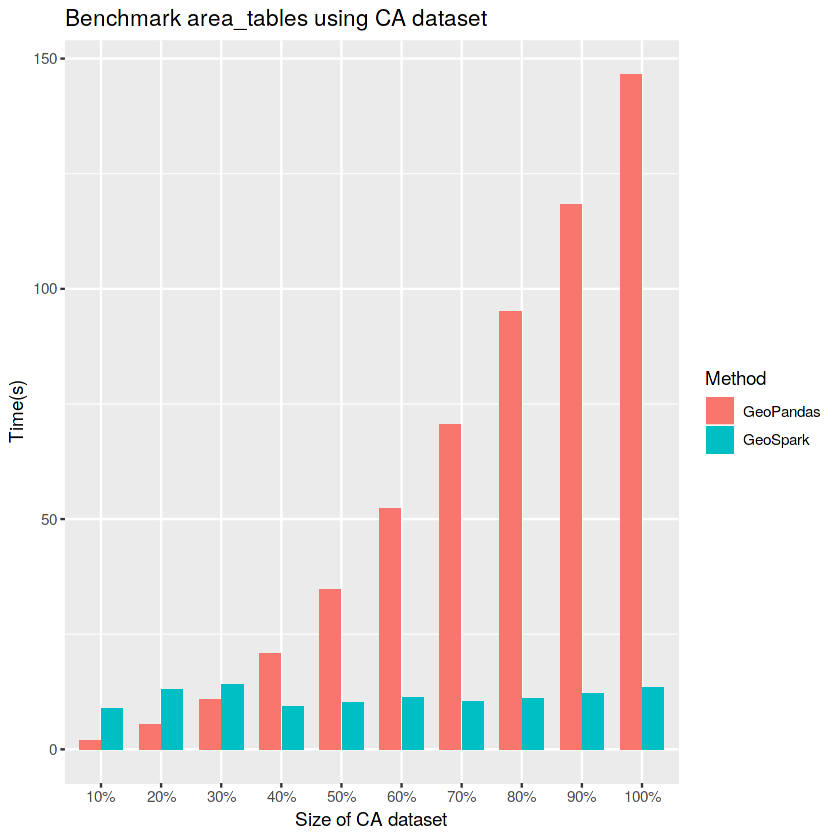

In [20]:
g = ggplot(data=benchmark, aes(x=Size, y=AreaTablesTime, fill=Method)) +
    geom_bar(stat="identity", position=position_dodge(width = 0.75), width = 0.7) +
    labs(title="Benchmark area_tables using CA dataset", y="Time(s)", x="Size of CA dataset")
plot(g)

### Reading execution times for geospark implementation in the full dataset...

In [36]:
data = read_delim("/home/and/RIDIR/Code/Validation/GeoSparkFull.tsv", delim = "|", col_names = F) %>%
        rename(Timestamp=X1, Method=X2, Cores=X3, Nodes=X4, Partitions=X5, Time=X6, Results=X7, Size=X8, AppID=X9) %>%
        select(Size, Time) %>%
        mutate(Size = paste0(Size * 100, "%"), Time = as.numeric(Time)) %>%
        group_by(Size) %>% summarise(Time = mean(Time))
data$Size <- factor(data$Size, levels = c("20%", "40%", "60%", "80%", "100%"))
head(data)

Parsed with column specification:
cols(
  X1 = col_character(),
  X2 = col_character(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_character()
)


Size,Time
100%,93.216
20%,42.360
40%,47.984
60%,59.570
80%,74.338


### Plotting execution times...
The Full dataset has 72693 polygons in the source and 61332 polygons in the target.  As reference, the geopandas implementation in the full dataset throws a memory error after ~45min of execution...

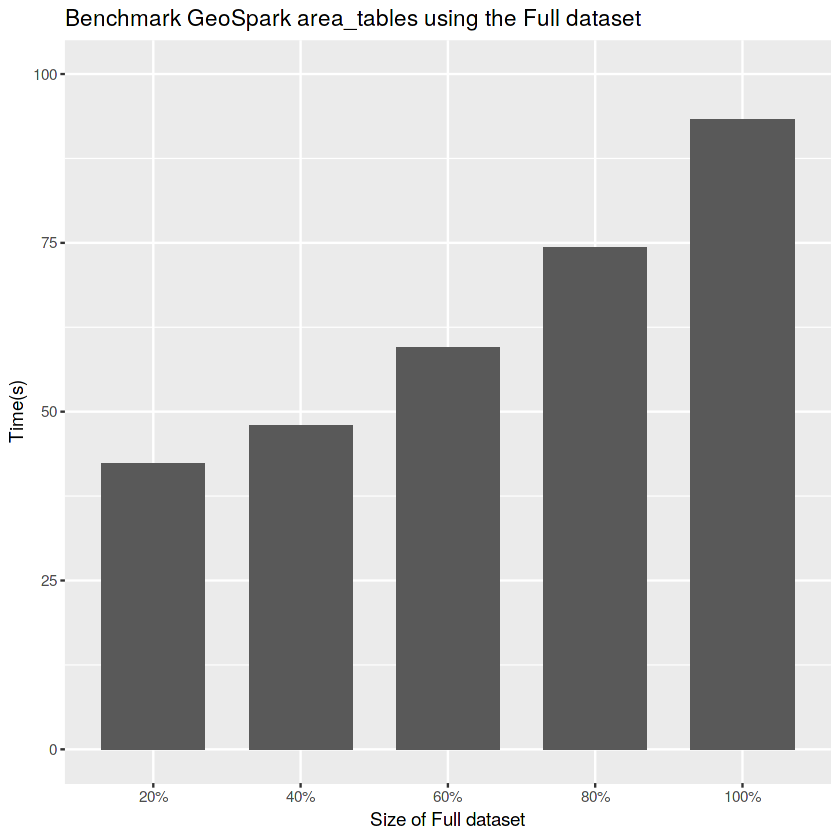

In [39]:
f = ggplot(data=data, aes(x=Size, y=Time)) +
    geom_bar(stat="identity", position=position_dodge(width = 0.75 ), width = 0.7) + ylim(0, 100) +
    labs(title="Benchmark GeoSpark area_tables using the Full dataset", y="Time(s)", x="Size of Full dataset")
plot(f)